In [55]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [10]:
df = pd.read_csv(r'C:\Users\eskil\PycharmProjects\tdt4173\Data\billboard-hits-flops-raw.csv', sep = ",")

Text(0.5, 1.0, 'Popularity Distribution')

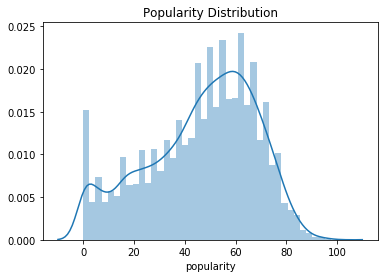

In [8]:
df.distplot(training90s['popularity']).set_title('Popularity Distribution')

Text(0.5, 1.0, 'Popularity Distribution')

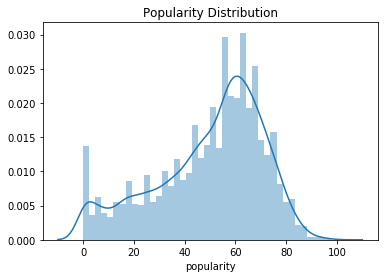

In [13]:
flops = df.loc[df['popularity'] < 55]
diff = len(df.loc[df['popularity'] < 55]) - len(df.loc[df['popularity'] > 55])
sampled = flops.sample(n = diff)
df = df.drop(sampled.index)

sns.distplot(df['popularity']).set_title('Popularity Distribution')

Text(0.5, 0, 'Non hits and hits')

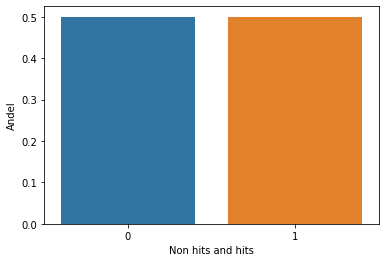

In [37]:
#Plot fordeling av hit/ikke-hit
hit_perc = training90s['target'].value_counts()/len(training90s)
sns.barplot(x=hit_perc.index, y=hit_perc.values)
plt.ylabel("Andel")
plt.xlabel("Non hits and hits")

C:\Users\eskil\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



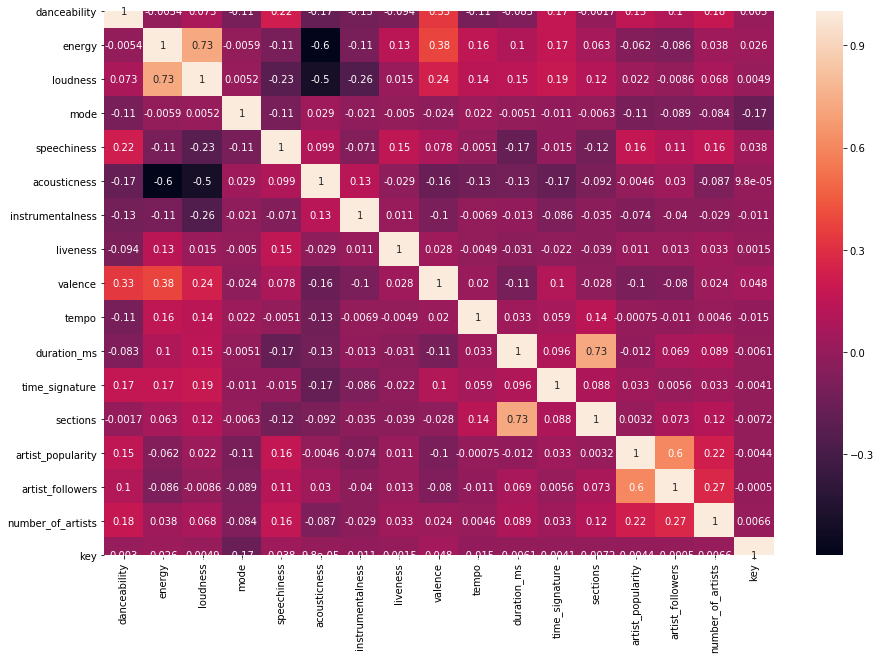

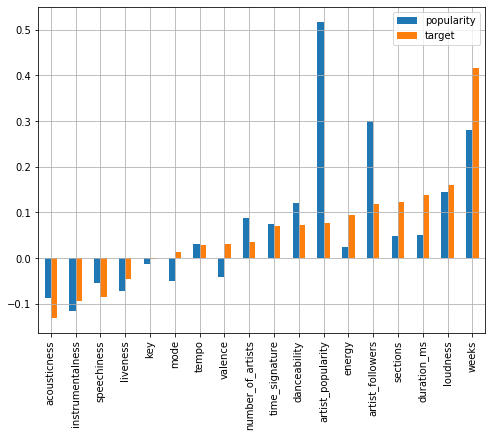

In [65]:
#Heatmap for å se korrelasjon mellom variable seg imellom
correlation = df.corr()
heatmap = correlation.drop(labels = ["target", "popularity", "weeks"], axis = 0)
heatmap = heatmap.drop(labels = ["target", "popularity", "weeks"], axis = 1)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(heatmap, ax = ax, annot = True)

##Stolpediagram for å se korrelasjon med target-variable
target_corr = correlation['target']
popularity_corr = correlation['popularity']

popularity_corr = popularity_corr.drop(labels = ["target", "popularity"])
target_corr = target_corr.drop(labels = ['target', 'popularity'])
popularity_corr = popularity_corr.sort_values()
target_corr = target_corr.sort_values()

dataframe = pd.concat([popularity_corr, target_corr], axis = 1)
dataframe = dataframe.sort_values(by = 'target')
dataframe.plot(grid = True, figsize = (8,6), kind = 'bar')
#sns.heatmap(training90s.corr())

In [14]:
print(pd.pivot_table(training90s, index = 'target', columns = 'key', values = 'tempo', aggfunc ='count'))

key      0    1    2    3    4    5    6    7    8    9    10   11
target                                                            
0       362  193  337  123  222  255  138  362  135  319  158  156
1       284  298  226   71  201  234  235  347  178  244  214  228


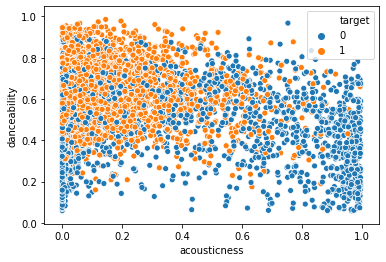

In [40]:
training90s.head()
sns.scatterplot(x='acousticness',y='danceability', data =training90s, hue='target')
sns.scatterplot(x='acousticness',y='danceability', data =training90s, hue='target')
#sns.scatterplot(x='',y='danceability', data =training90s,hue='target')
#sns.scatterplot(x='tempo',y='danceability', data =training90s,hue='target')

In [62]:
#acoustic_mean_hit = df.loc[df['target'] == 0].acousticness.mean()
#print(acoustic_mean_hit)
#acoustic_mean_hit = df.loc[df['target'] == 1].acousticness.mean()
#print(acoustic_mean_hit)
df.describe()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,sections,target,popularity,weeks,artist_popularity,artist_followers,number_of_artists,key
count,12469.000000,12469.000000,12469.000000,12469.000000,12469.00000,12469.000000,12469.000000,12469.000000,12469.000000,12469.000000,1.246900e+04,12469.000000,12469.000000,12469.000000,12469.000000,12469.000000,12469.000000,1.246900e+04,12469.000000,12469.000000
mean,0.631192,0.665250,-6.388272,0.644799,0.12611,0.200556,0.017510,0.190418,0.495067,121.900783,2.170977e+05,3.949555,9.630443,0.538696,49.765819,64.091266,77.983238,9.933513e+06,1.376454,5.222712
std,0.152133,0.184718,2.906212,0.478593,0.14220,0.243060,0.102529,0.147928,0.224260,30.301409,5.684833e+04,0.371126,2.799140,0.498520,21.148994,142.728277,15.532732,1.411906e+07,0.774914,3.596024
min,0.000000,0.000284,-38.370000,0.000000,0.00000,0.000002,0.000000,0.000000,0.000000,0.000000,5.920000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,0.530000,0.547000,-7.480000,0.000000,0.03760,0.022200,0.000000,0.097900,0.322000,96.980000,1.891490e+05,4.000000,8.000000,0.000000,37.000000,0.000000,70.000000,1.141053e+06,1.000000,2.000000
50%,0.636000,0.686000,-5.855000,1.000000,0.06140,0.095700,0.000000,0.131000,0.490000,121.029000,2.151600e+05,4.000000,10.000000,1.000000,55.000000,0.000000,81.000000,4.188345e+06,1.000000,5.000000
75%,0.740000,0.808000,-4.579000,1.000000,0.16600,0.291000,0.000030,0.243000,0.668000,143.078000,2.430130e+05,4.000000,11.000000,1.000000,65.000000,59.000000,90.000000,1.268643e+07,2.000000,8.000000
max,0.986000,1.000000,0.221000,1.000000,0.96600,0.996000,0.998000,0.993000,0.977000,217.880000,1.247294e+06,5.000000,62.000000,1.000000,100.000000,1136.000000,100.000000,1.172432e+08,22.000000,11.000000


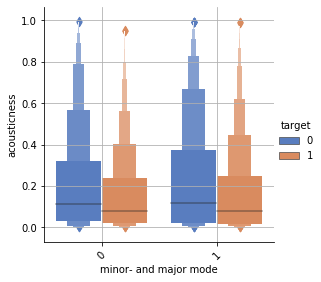

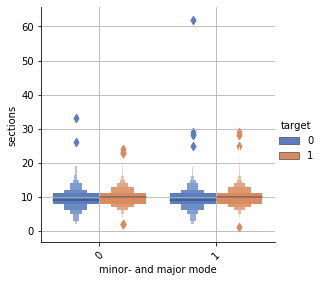

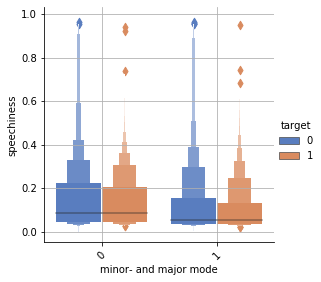

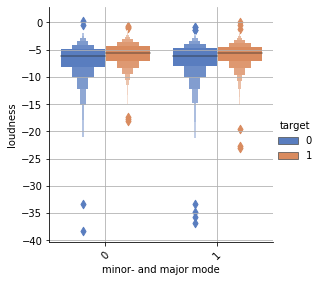

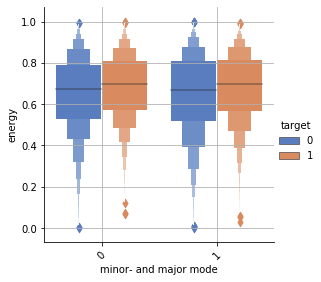

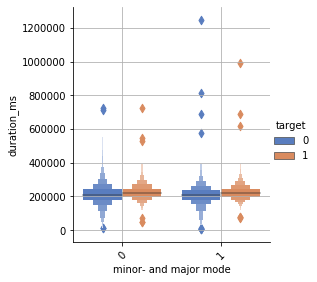

In [64]:
chart = sns.catplot(x = "mode", y="acousticness", hue="target", data = df, height=4, aspect=1, kind="boxen", palette="muted");
plt.grid()
plt.xlabel("minor- and major mode")
chart.set_xticklabels(rotation=45);

chart = sns.catplot(x = "mode", y="sections", hue="target", data = df, height=4, aspect=1, kind="boxen", palette="muted");
plt.grid()
plt.xlabel("minor- and major mode")
chart.set_xticklabels(rotation=45);

chart = sns.catplot(x = "mode", y="speechiness", hue="target", data = df, height=4, aspect=1, kind="boxen", palette="muted");
plt.grid()
plt.xlabel("minor- and major mode")
chart.set_xticklabels(rotation=45);

chart = sns.catplot(x = "mode", y="loudness", hue="target", data = df, height=4, aspect=1, kind="boxen", palette="muted");
plt.grid()
plt.xlabel("minor- and major mode")
chart.set_xticklabels(rotation=45);

chart = sns.catplot(x = "mode", y="energy", hue="target", data = df, height=4, aspect=1, kind="boxen", palette="muted");
plt.grid()
plt.xlabel("minor- and major mode")
chart.set_xticklabels(rotation=45);

chart = sns.catplot(x = "mode", y="duration_ms", hue="target", data = df, height=4, aspect=1, kind="boxen", palette="muted");
plt.grid()
plt.xlabel("minor- and major mode")
chart.set_xticklabels(rotation=45);

